In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#transition matrix

A=[[0.25, 0,    0,    0,    0,    0.25], 
   [0.25, 0.25, 0.25, 0.25, 0.25, 0.25],
   [0.25, 0.25, 0,    0.5,  0.25, 0.25],
   [0,    0,    0.5,  0,    0,    0   ],
   [0,    0.25, 0,    0,    0.25, 0   ],
   [0.25, 0.25, 0.25, 0.25, 0.25, 0.25]]

print(A)

[[0.25, 0, 0, 0, 0, 0.25], [0.25, 0.25, 0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0, 0.5, 0.25, 0.25], [0, 0, 0.5, 0, 0, 0], [0, 0.25, 0, 0, 0.25, 0], [0.25, 0.25, 0.25, 0.25, 0.25, 0.25]]


In [3]:
aygen = np.linalg.eig(A)

In [4]:
pi=np.transpose(aygen[1])[0]
pi=np.real(pi)
pi/=sum(pi)
pi

array([ 0.08333333,  0.25      ,  0.22222222,  0.11111111,  0.08333333,
        0.25      ])

In [5]:
piscalar = np.diag(pi)
print(np.matmul(piscalar, A))

[[ 0.02083333  0.          0.          0.          0.          0.02083333]
 [ 0.0625      0.0625      0.0625      0.0625      0.0625      0.0625    ]
 [ 0.05555556  0.05555556  0.          0.11111111  0.05555556  0.05555556]
 [ 0.          0.          0.05555556  0.          0.          0.        ]
 [ 0.          0.02083333  0.          0.          0.02083333  0.        ]
 [ 0.0625      0.0625      0.0625      0.0625      0.0625      0.0625    ]]


We observe that the transition matrix, after its columns scaled with corresponding values in the stationary distribution, is not symmetrical. We conclude that the detailed balance condition is not met.

In [6]:
e= 10**-8
t_mix=0
naught=[1,0,0,0,0,0]
while sum(np.absolute(naught-pi))>e:
    naught=np.matmul(A, naught)
    t_mix+=1
    
print(t_mix)

25


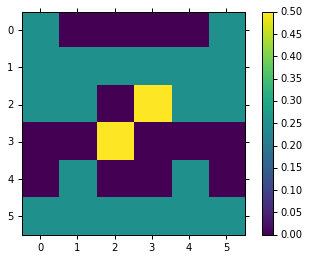

In [7]:
plt.imshow(np.linalg.matrix_power(A,1))
plt.colorbar()

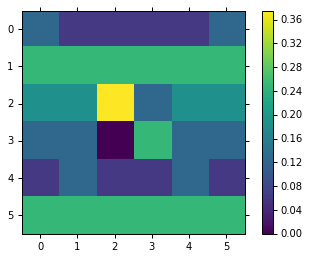

In [8]:
plt.imshow(np.linalg.matrix_power(A,2))
plt.colorbar()

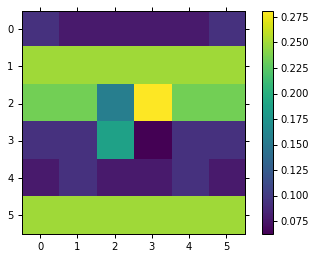

In [9]:
plt.imshow(np.linalg.matrix_power(A,3))
plt.colorbar()

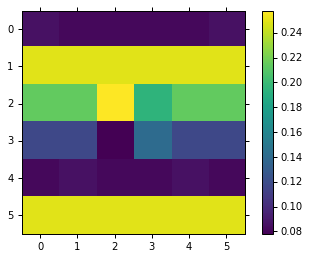

In [10]:
plt.imshow(np.linalg.matrix_power(A,4))
plt.colorbar()

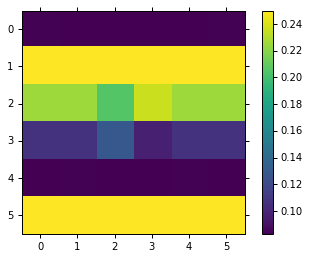

In [11]:
plt.imshow(np.linalg.matrix_power(A,5))
plt.colorbar()

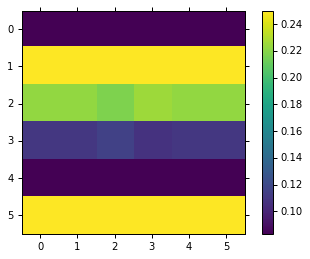

In [12]:
plt.imshow(np.linalg.matrix_power(A,7))
plt.colorbar()

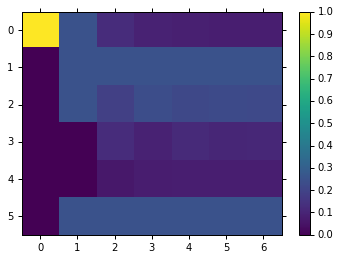

In [13]:
naught=[1,0,0,0,0,0]

plot=np.transpose([naught, np.matmul(A,naught),
      np.matmul(np.linalg.matrix_power(A,2),naught),
      np.matmul(np.linalg.matrix_power(A,3),naught),
      np.matmul(np.linalg.matrix_power(A,4),naught),
      np.matmul(np.linalg.matrix_power(A,5),naught),
      np.matmul(np.linalg.matrix_power(A,6),naught)])

plt.imshow(plot)
plt.colorbar()

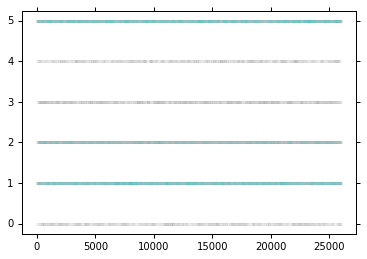

In [14]:
states=np.zeros(6)
state=0
chain=[]


for i in range(1000):
    for j in range(t_mix+1):
        seed=np.random.rand(1)
        temp=0
        for k in range(6):
            temp+=np.transpose(A)[state][k]
            if seed<temp:
                state=k
                break
        chain.append(state)
    states[k]+=1
    
plt.plot(chain, '.c', alpha= 0.005)

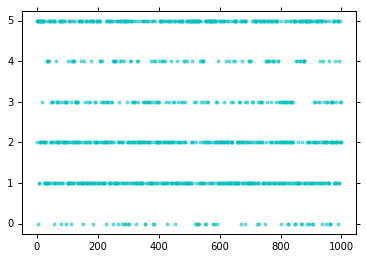

In [15]:
states=np.zeros(6)
state=0
chain=[]

for i in range(t_mix):
    seed=np.random.rand(1)
    temp=0
    for k in range(6):
        temp+=np.transpose(A)[state][k]
        if seed<temp:
            state=k
            break

for i in range(1000):
    seed=np.random.rand(1)
    temp=0
    for k in range(6):
        temp+=np.transpose(A)[state][k]
        if seed<temp:
            state=k
            chain.append(state)
            break
    states[state]+=1
    
plt.plot(chain, '.c', alpha= 0.5)